In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
def withStar(string):
  if string=='':
    return '';
  else:
    return '**'+string[:]+'**'

In [3]:
def grams(string,num)->list[str]:
    string=withStar(string)
    begin=len(string)-num;
    token=[];
    for i in range(begin+1):
        a=[];
        a=string[i:i+3]
        token.append(a);
    return token;

In [4]:
def overlap(string1,string2)->int:
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    m=min(len(s1),len(s2));
    if m==0: 
        return 0;
    else:
        sim1=lc/m;
        return sim1;

In [5]:
def jaccard(string1,string2):
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    union_elements=list(set(s1).union(set(s2)));
    lu=len(union_elements);
    if lu==0:
        return 0;
    else:
        sim2 = lc/lu;
        return sim2;

In [6]:
def dice(string1,string2):
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    if len(s1)+len(s2)==0:
        return 0;
    else:
        sim3=2*lc/(len(s1)+len(s2));
        return sim3;

In [7]:
amazon_train = pd.read_csv("amazonGoogle_train.tsv", sep="\t")
amazon_train

,idx,text_left,text_right,label
0,0,microsoft visio standard 2007 version upgrade ...,adobe cs3 design standard upgrade 413.99,0
1,1,microsoft mappoint 2006 with gps microsoft 349.0,microsoft student with encarta premium 2008 co...,0
2,2,adobe after effects professional 7.0 adobe 999.0,adobe flash cs3 professional ( mac ) 699.0,0
3,3,motu digital performer 5 digital audio softwar...,motu digital performer dp5 software music prod...,1
4,4,illustrator cs3 13 mac ed 1u adobe-education-b...,adobe illustrator cs3 for mac academic adobe-e...,1
...,...,...,...,...
6869,6869,microsoft visual studio team suite 2005 with m...,f1q-00302 microsoft visual studio 2005 profess...,0
6870,6870,microsoft word 2004 upgrade ( mac ) microsoft ...,microsoft b21-00806 ae mappoint 2006 cd 50.39,0
6871,6871,adobe after effects professional 7.0 adobe 999.0,15510669dm adobe after effects cs3 professiona...,0
6872,6872,system care professional avanquest 49.95,microsoft office and windows training professi...,0


In [8]:
question1=amazon_train['text_left']
question2=amazon_train['text_right']
mark=amazon_train['label']

In [9]:
# #data processing
# question1_token=[]
# question2_token=[]
# for i in range(len(question1)):
#     question1_token.append(grams(question1[i],3))
# for i in range(len(question2)):
#     question2_token.append(grams(question2[i],3))
question1

0       microsoft visio standard 2007 version upgrade ...
1        microsoft mappoint 2006 with gps microsoft 349.0
2        adobe after effects professional 7.0 adobe 999.0
3       motu digital performer 5 digital audio softwar...
4       illustrator cs3 13 mac ed 1u adobe-education-b...
                              ...                        
6869    microsoft visual studio team suite 2005 with m...
6870    microsoft word 2004 upgrade ( mac ) microsoft ...
6871     adobe after effects professional 7.0 adobe 999.0
6872             system care professional avanquest 49.95
6873      punch ! super home suite punch ! software 49.99
Name: text_left, Length: 6874, dtype: object

In [10]:
question2

0                adobe cs3 design standard upgrade 413.99
1       microsoft student with encarta premium 2008 co...
2              adobe flash cs3 professional ( mac ) 699.0
3       motu digital performer dp5 software music prod...
4       adobe illustrator cs3 for mac academic adobe-e...
                              ...                        
6869    f1q-00302 microsoft visual studio 2005 profess...
6870        microsoft b21-00806 ae mappoint 2006 cd 50.39
6871    15510669dm adobe after effects cs3 professiona...
6872    microsoft office and windows training professi...
6873    punch software 14100 punch ! professional home...
Name: text_right, Length: 6874, dtype: object

In [11]:
#calculate the overlap coefficient
overlap_coefficient=[]
for i in range(len(question1)):
    overlap_coefficient.append(overlap(question1[i],question2[i]))

In [12]:
#get the equal coefficient
equal_overlap=[]
for i in range(len(overlap_coefficient)):
    if mark[i]==1:
        equal_overlap.append(overlap_coefficient[i])
#         print("The two sentence is equal, overlap coefficient is:",overlap_coefficient[i])
#         print(question1[i])
#         print(question2[i])
#         print('-'*50)

In [13]:
#get the equal coefficient
inequal_overlap=[]
for i in range(len(overlap_coefficient)):
    if mark[i]==0:
        inequal_overlap.append(overlap_coefficient[i])
#         print("The two sentence is not equal, overlap coefficient is:",overlap_coefficient[i])
#         print(question1[i])
#         print(question2[i])
#         print('-'*50)

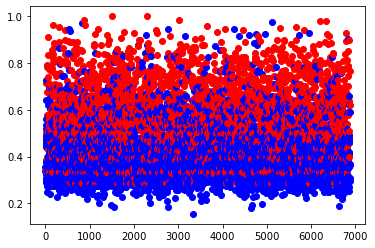

In [14]:
for i in range(len(overlap_coefficient)):
    if overlap_coefficient[i] in equal_overlap:
        plt.scatter(i,overlap_coefficient[i],color='r')
    else:
        plt.scatter(i,overlap_coefficient[i],color='b')
##thershold 0.5

In [15]:
# x=np.linspace(0,1,len(inequal_overlap))
# plt.plot(x,inequal_overlap)

In [16]:
#calculate the jaccard coefficient
jaccard_coefficient=[]
for i in range(len(question1)):
    jaccard_coefficient.append(jaccard(question1[i],question2[i]))

In [17]:
#get the equal coefficient
equal_jaccard=[]
for i in range(len(jaccard_coefficient)):
    if mark[i]==1:
        equal_jaccard.append(jaccard_coefficient[i])
#         print("The two sentence is equal, overlap coefficient is:",jaccard_coefficient[i])
#         print(question1[i])
#         print(question2[i])
#         print('-'*50)

In [18]:
#get the inequal coefficient
inequal_jaccard=[]
for i in range(len(jaccard_coefficient)):
    if mark[i]==0:
        inequal_jaccard.append(jaccard_coefficient[i])
#         print("The two sentence is not equal, overlap coefficient is:",jaccard_coefficient[i])
#         print(question1[i])
#         print(question2[i])
#         print('-'*50)

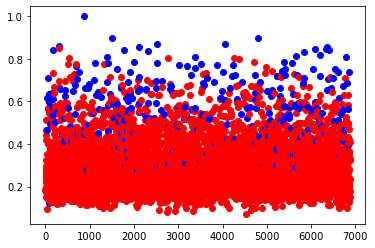

In [19]:
for i in range(len(jaccard_coefficient)):
    if jaccard_coefficient[i] in inequal_jaccard:
        plt.scatter(i,jaccard_coefficient[i],color='r')
    else:
        plt.scatter(i,jaccard_coefficient[i],color='b')
# worse than overlap coeffient

In [20]:
#calculate the dice's coefficient
dice_coefficient=[]
for i in range(len(question1)):
    dice_coefficient.append(dice(question1[i],question2[i]))

In [21]:
#get the equal coefficient
equal_dice=[]
for i in range(len(dice_coefficient)):
    if mark[i]==1:
        equal_dice.append(dice_coefficient[i])
#         print("The two sentence is equal, overlap coefficient is:",dice_coefficient[i])
#         print(question1[i])
#         print(question2[i])
#         print('-'*50)

In [22]:
#get the inequal coefficient
inequal_dice=[]
for i in range(len(dice_coefficient)):
    if mark[i]==0:
        inequal_dice.append(dice_coefficient[i])
#         print("The two sentence is not equal, overlap coefficient is:",dice_coefficient[i])
#         print(question1[i])
#         print(question2[i])
#         print('-'*50)

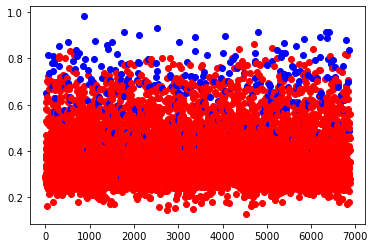

In [23]:
for i in range(len(dice_coefficient)):
    if dice_coefficient[i] in inequal_dice:
        plt.scatter(i,dice_coefficient[i],color='r')
    else:
        plt.scatter(i,dice_coefficient[i],color='b')

In [24]:
# use equal weight in each coefficient
coefficient=[]
for i in range(len(mark)):
    coefficient.append(overlap_coefficient[i]/3+jaccard_coefficient[i]/3+dice_coefficient[i]/3)

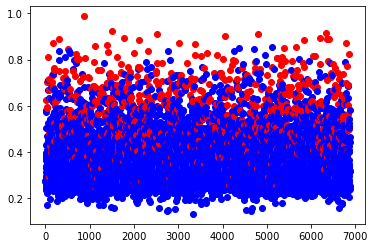

In [25]:
for i in range(len(coefficient)):
    if mark[i]==1:
        plt.scatter(i,coefficient[i],color='r')
    else:
        plt.scatter(i,coefficient[i],color='b')
# same as overlap coefficient

In [26]:
amazon_test = pd.read_csv("amazonGoogle_test.tsv", sep="\t")

In [27]:
amazon_test

,idx,text_left,text_right,label
0,0,microsoft visual studio test agent 2005 cd 1 p...,individual software professor teaches microsof...,0
1,1,adobe dreamweaver cs3 [ mac ] adobe 399.0,adobe cs3 web premium 1659.99,0
2,2,instant immersion spanish 2.0 topics entertain...,instant immers japanese dlx 2 . 36.11,0
3,3,i transfer dvds 2 ipod edition ( win/mac ) me-...,ghost recon gold edition ( dvd-rom ) 20.95,0
4,4,adobe flash pro cs3 upgrade [ mac ] adobe 199.0,adobe illustrator cs3 ( mac ) 599.0,0
...,...,...,...,...
2288,2288,instant immersion german audio topics entertai...,instant immers french dlx 2 27.57,0
2289,2289,adobe flash pro cs3 [ mac ] adobe 699.0,38039295dm adobe flash cs3 professional v. 9 m...,0
2290,2290,let 's learn about time & date selectsoft publ...,it 's about time products learn the switch to ...,0
2291,2291,quicken legal business pro 2007 nolo press 79.99,quickbooks ( r ) pro 2007 179.99,0


In [28]:
question1_test=amazon_test['text_left']
question2_test=amazon_test['text_right']
mark_test=amazon_test['label']

In [29]:
test_overlap=[]
test_jaccard=[]
test_dice=[]
for i in range(len(question1_test)):
    test_overlap.append(overlap(question1_test[i],question2_test[i]))
    test_jaccard.append(jaccard(question1_test[i],question2_test[i]))
    test_dice.append(dice(question1_test[i],question2_test[i]))

In [30]:
#calculate the overlap coefficient
coefficient_test=[]
for i in range(len(question1_test)):
    coefficient_test.append(overlap(question1_test[i],question2_test[i])/3+jaccard(question1_test[i],question2_test[i])/3+dice(question1_test[i],question2_test[i])/3)

In [31]:
    coefficient_test.append(overlap(question1_test[i],question2_test[i])/3+jaccard(question1_test[i],question2_test[i])/3+dice(question1_test[i],question2_test[i])/3)

In [32]:
def calculate_is_duplicate(coefficient):
    mark=[]
    for i in range(len(coefficient)):
        if coefficient[i] >= 0.38:
            mark.append(1)
        else:
            mark.append(0)
    return mark

In [33]:
mark_calculate=calculate_is_duplicate(coefficient_test)

In [34]:
def acc(mark_real,mark_test):
    sum = 0
    for i in range(len(mark_real)):
        if mark_real[i]==mark_test[i]:
            sum=sum+1
        else:
            continue
    return sum/len(mark_test)

In [35]:
acc(mark_test,mark_calculate)

0.6795989537925021

In [36]:
# use a classifier to predict the result
X_train=[]
X_test=[]
for i in range(len(question1)):
    co=(overlap_coefficient[i], jaccard_coefficient[i], dice_coefficient[i])
    X_train.append(co)
y_train=mark
for i in range(len(question1_test)):
    co=(test_overlap[i], test_jaccard[i], test_dice[i])
    X_test.append(co)
y_test=mark_test

In [37]:
#use KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
model=knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set predictions:
[1 0 0 ... 0 0 0]
Test set score: 0.88
Test set score: 0.88
